In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from math import exp
from math import sin
from math import cos
from math import sqrt
from math import pi

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

### Константы и переменные:

In [2]:
g = 0.43
mu = 927.4e-26
h_bar = 1.054e-34
gamma = 1

B = 2e-3
b = 0.3e-3
T1 = 250e-9
T2 = 250e-9
f = 20e+6

### Самая главная часть, которая перемножает матрицы и всё расчитывает:

In [3]:
def spin(B, b, T1, T2, f):

    T = 1/f
    omega1 = g*mu*B/h_bar
    omega2 = g*mu*sqrt(b**2 + B**2)/h_bar
    s_st = gamma*B
    
    e1 = exp(-T/T1)
    e2 = exp(-T/T2)
    c1, c2 = cos(omega1*T/2), cos(omega2*T/2)
    s1, s2 = sin(omega1*T/2), sin(omega2*T/2)
    c, s = B/sqrt(B**2+b**2), b/sqrt(B**2+b**2)

    A = np.array([[(c2*c*c1-s2*s1)*e2**2 - c,
                   (-c2*c*s1-s2*c1)*e2**2, 
                   (-c2*s)*e2*e1 + s],

                  [(s2*c*c1+c2*s1)*e2**2,
                   (-s2*c*s1+c2*c1)*e2**2 - 1,
                   (-s2*s)*e1*e2],

                  [s*c1*e1*e2 - s,
                   -s*s1*e2*e1,
                   c*e1**2 - c]])
    
    B = np.array([[(c*c2*e2) + 1,
                   -s2*e2, 
                   s*c2*e2],

                  [(c*s2*e2),
                   c1*e2 + 1,
                   (-s*s2)*e2],

                  [s*e1,
                   0,
                   c*e1 + 1]])
    
    ss = np.array([s*c2*e2*s_st*(1-e1), s*s2*e2*s_st*(1-e1), (-c*e1-1)*s_st*(1-e1)])
    #ss = np.array([0, 0, s_st*(1-e1)])
    
    
    s = np.linalg.solve(A, ss)
    
    #*div_delta_s = *div(s2-s0) in terms of [div(delta_s[x]), div(delta_s[x]), div(delta_s[x])]
    dds = A@[1., 1., 1.]
    ddds = sqrt(dds@dds)
    
    return s

### Импорт эксперимента:

In [4]:
folder = '/Users/alexandrakorotneva/лаба/2019.07.04-GaAs/'
#name = 'GaAsT6KBm130mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz'
name = ['GaAsT6KBm150mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz',
        'GaAsT6KBm140mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz',
        'GaAsT6KBm130mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz',
        'GaAsT6KBm120mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz',
        'GaAsT6KBm110mmVoigtPr1p5mWExc826nmSquareCWProfile5VOffset0VDelay300x3msFreqRange0p1-20MHz']

D = []
for i in range(5):
    table = pd.read_csv(folder+name[i]+'.dat', sep='  ', names=['f', 'x', 'y'])
    tall = len(table['f'])
    table = table.assign(r1=pd.Series(-1*np.ones(tall)).values)
    f = lambda x: x**2
    table.r1 = table['x'].apply(f) + table['y'].apply(f)
    
    D.append(table.r1)
F = table.f*1000

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


### Дальше строятся графики:  
B1 = <span style="color:blue">0.83mT</span> - синий  
B2 = <span style="color:red">0.99mT</span> - красный  
B3 = <span style="color:green">1.28mT</span> - зеленый  
B4 = <span style="color:gold">1.65mT</span> - желтый  

Все графики в **логарифмическом** масштабе

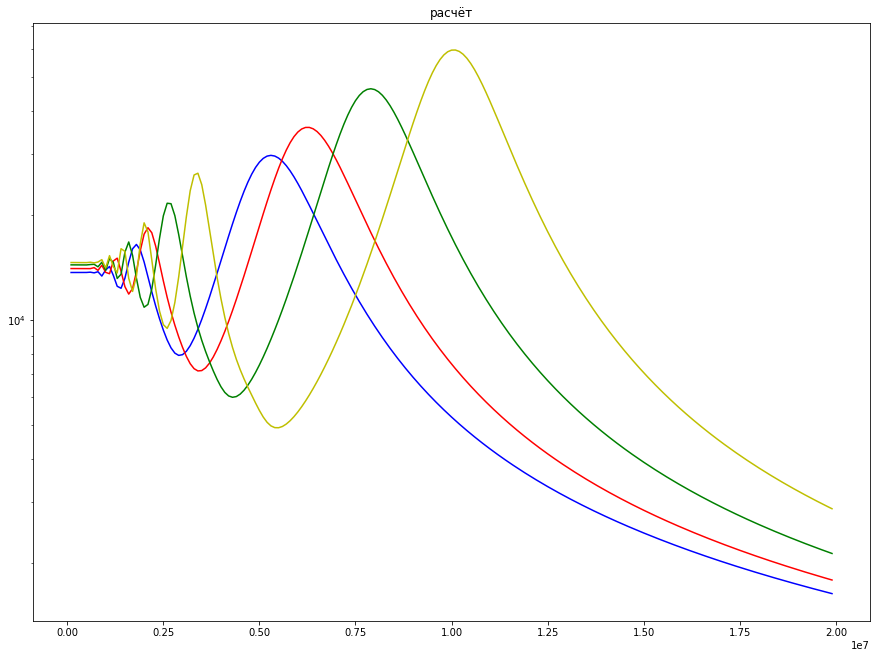

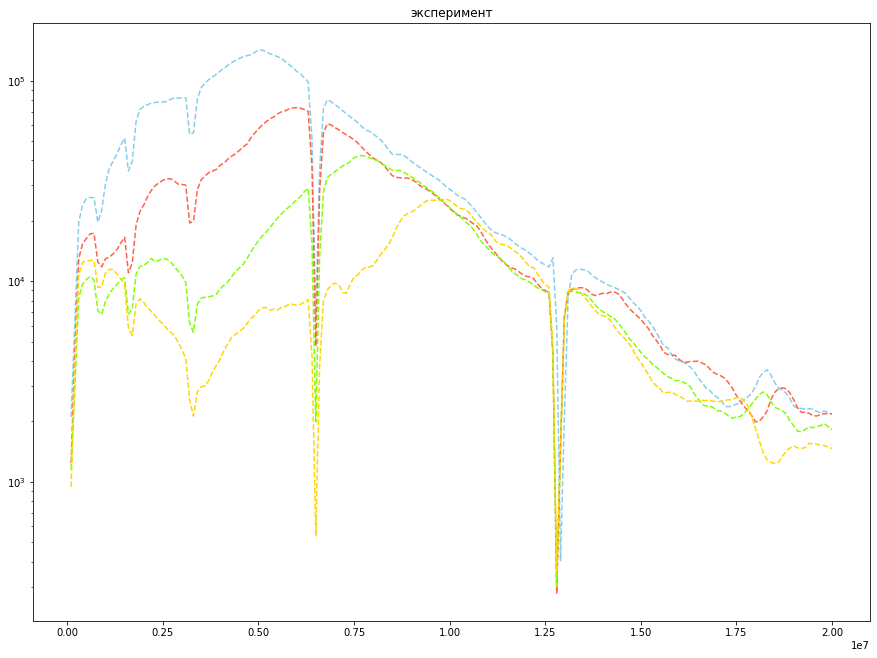

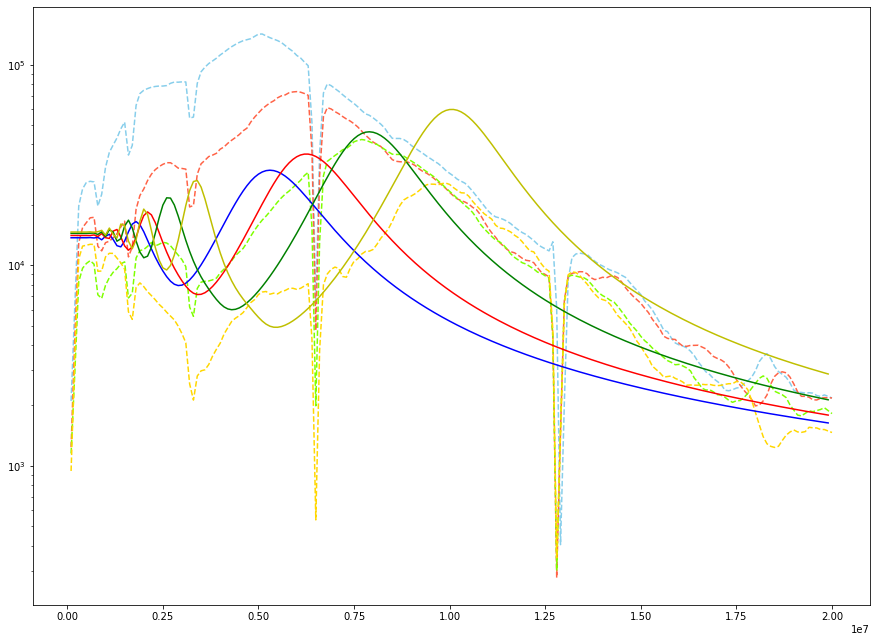

In [6]:
mf = np.arange(0.1e6, 20e6, 1e5)

msfx = [spin(B, b, T1, T2, x)[0] for x in mf]
msfy = [spin(B, b, T1, T2, x)[1] for x in mf]
msfz = [spin(B, b, T1, T2, x)[2] for x in mf]

B1 = 0.831e-3 #синий
B2 = 0.997e-3 #красный
B3 = 1.279e-3 #зеленый
B4 = 1.645e-3 #желтый 
B5 = 2.194e-3 

msf1 = [sqrt(spin(B1, b, T1, T2, x)[0]**2)*10e7-14514.86 for x in mf]
msf2 = [sqrt(spin(B2, b, T1, T2, x)[0]**2)*10e7-14662 for x in mf]
msf3 = [sqrt(spin(B3, b, T1, T2, x)[0]**2)*10e7-14794 for x in mf]
msf4 = [sqrt(spin(B4, b, T1, T2, x)[0]**2)*10e7-14875.4 for x in mf]
msf5 = [sqrt(spin(B5, b, T1, T2, x)[0]**2)*10e7-14930 for x in mf]
#msf5 = [sqrt(spin(B5, b, T1, T2, x)[0]**2 + spin(B5, b, T1, T2, x)[1]**2) for x in mf]

plt.figure(figsize=(15, 11))
plt.yscale('log')
plt.title('расчёт')

plt.plot(mf, msf1, color='b')
plt.plot(mf, msf2, color='r')
plt.plot(mf, msf3, color='g')
plt.plot(mf, msf4, color='y')
#plt.plot(mf, msf5, color='purple')

plt.figure(figsize=(15, 11))
plt.yscale('log')
plt.title('эксперимент')

plt.plot(F, D[0], color='skyblue', linestyle='--')
plt.plot(F, D[1], color='tomato', linestyle='--')
plt.plot(F, D[2], color='chartreuse', linestyle='--')
plt.plot(F, D[3], color='gold', linestyle='--')
#plt.plot(F, D[4], color='orchid', linestyle='--')

plt.figure(figsize=(15, 11))
plt.yscale('log')

plt.plot(F, D[0], color='skyblue', linestyle='--')
plt.plot(F, D[1], color='tomato', linestyle='--')
plt.plot(F, D[2], color='chartreuse', linestyle='--')
plt.plot(F, D[3], color='gold', linestyle='--')
plt.plot(mf, msf1, color='b')
plt.plot(mf, msf2, color='r')
plt.plot(mf, msf3, color='g')
plt.plot(mf, msf4, color='y')